In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Using Real World Data

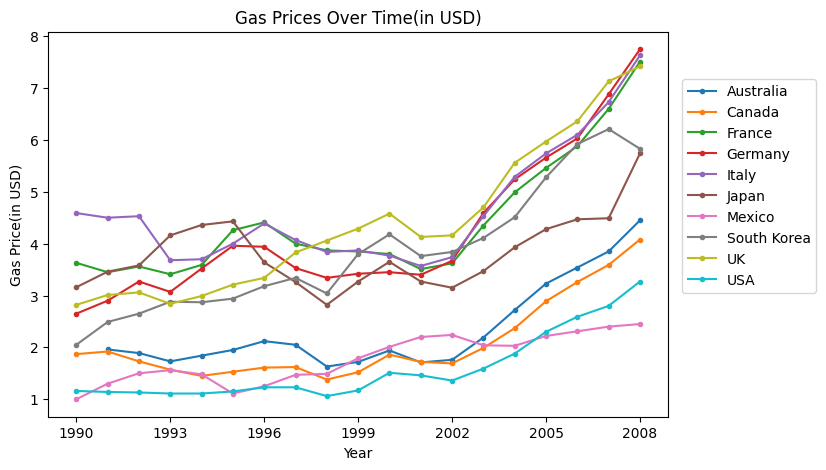

In [45]:
gas = pd.read_csv("gasprices.csv")

plt.figure(figsize=(8,5))
plt.title('Gas Prices Over Time(in USD)')

for country in gas:
    if country != 'Year':
        plt.plot(gas.Year, gas[country], label=country, marker='.')

plt.xticks(gas.Year[::3])

plt.xlabel('Year')

plt.ylabel('Gas Price(in USD)')

plt.legend(bbox_to_anchor = (1.25, 0.6), loc='center right')

plt.show()

Loading Fifa Data

In [61]:
fifa = pd.read_csv('/Users/zairefrazier/Documents/Developer/DS/matlib_basics/fifa_data.csv')
fifa.head(5)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


Histograms

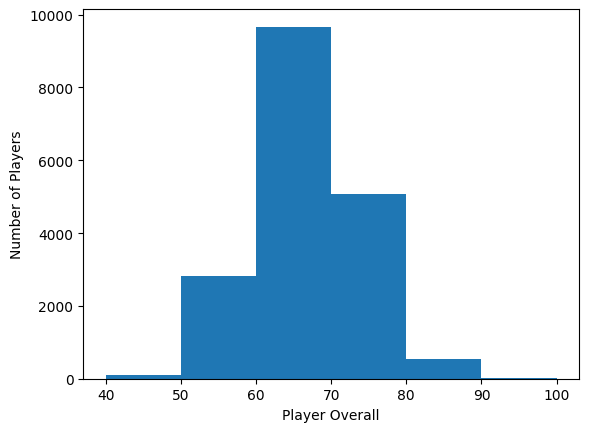

In [65]:
bins = [40,50,60,70,80,90, 100]



plt.xticks(bins)

plt.xlabel('Player Overall')
plt.ylabel('Number of Players')



plt.hist(fifa.Overall, bins=bins)


plt.show()

Pie Charts

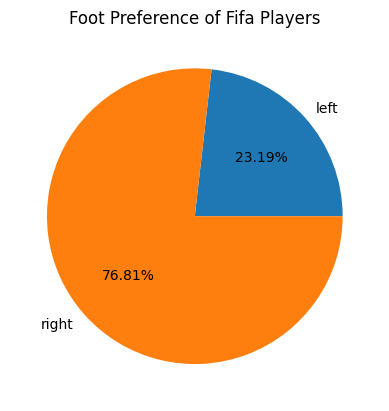

In [86]:
#Left & Right foot numbers from data
left = fifa.loc[fifa['Preferred Foot'] == 'Left'].count()[0]
right = fifa.loc[fifa['Preferred Foot'] == 'Right'].count()[0]

labels = ['left', 'right']

#Plotted data with labeled percents
plt.pie([left,right], labels= labels, autopct= '%.2f%%')

plt.title('Foot Preference of Fifa Players')


plt.show()


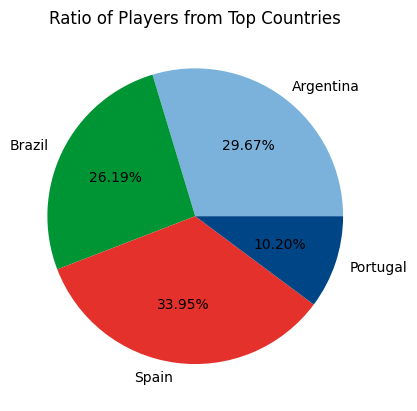

In [118]:
ag = fifa.loc[fifa['Nationality'] == 'Argentina'].count()[0]
bz = fifa.loc[fifa['Nationality'] == 'Brazil'].count()[0]
sp = fifa.loc[fifa['Nationality'] == 'Spain'].count()[0]
po = fifa.loc[fifa['Nationality'] == 'Portugal'].count()[0]

labels = ['Argentina', 'Brazil', 'Spain', 'Portugal']

color = ['#7ab2dc','#009534','#e4312b', '#004687']

# fifa['Nationality'].count()
# fifa.Nationality.value_counts()
ovrll = fifa[fifa['Overall'] >= 80]
#plyrOvrll = ovrll.Nationality.value_counts()

plt.pie([ag,bz, sp, po], autopct='%.2f%%', labels= labels, colors=color)

plt.title('Ratio of Players from Top Countries')

plt.show()

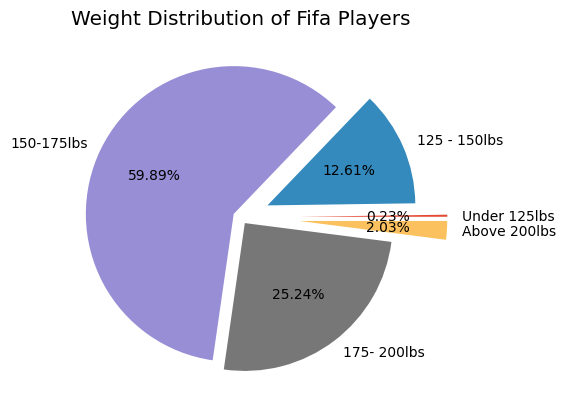

In [160]:
fifa.Weight = [int(x.strip('lbs')) if type(x) == str else x for x in fifa.Weight]

plt.style.use('ggplot')


light = fifa.loc[fifa.Weight < 125].count()[0]

medium_light = fifa.loc[(fifa.Weight >= 125) & (fifa.Weight < 150)].count()[0] 

medium = fifa.loc[(fifa.Weight >= 150) & (fifa.Weight < 175)].count()[0] 

medium_heavy = fifa.loc[(fifa.Weight >= 175) & (fifa.Weight < 200)].count()[0] 

heavy = fifa.loc[fifa.Weight >= 200 ].count()[0] 

weights = [light, medium_light, medium, medium_heavy, heavy]

labels = ['Under 125lbs', '125 - 150lbs', '150-175lbs', '175- 200lbs', 'Above 200lbs']

explode = (.4, .2, .05, .05, .4)

plt.pie(weights, labels= labels, autopct= '%.2f%%', explode= explode)

plt.title('Weight Distribution of Fifa Players')

plt.show()



Box and Whisker Plot

<function matplotlib.pyplot.show(close=None, block=None)>

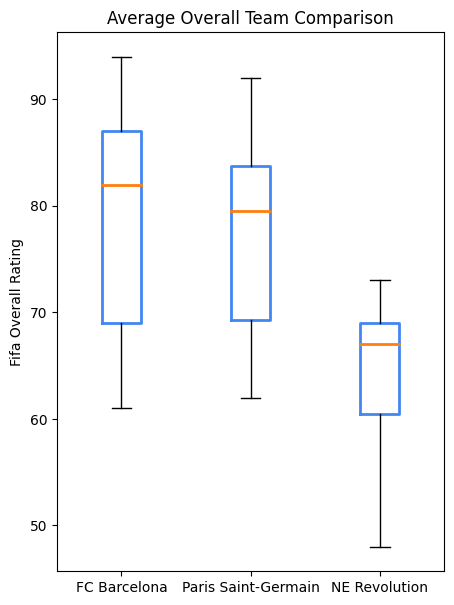

In [159]:
plt.style.use('default')

plt.figure(figsize=(5,7))

barcelona = fifa.loc[fifa.Club == 'FC Barcelona']['Overall']
psg = fifa.loc[fifa.Club == 'Paris Saint-Germain']['Overall']
revs = fifa.loc[fifa.Club == 'New England Revolution']['Overall']

labels = ['FC Barcelona', 'Paris Saint-Germain', 'NE Revolution']


boxes = plt.boxplot([barcelona, psg, revs], labels=labels, medianprops={'linewidth':2})

for box in boxes['boxes']:
    # Set Box color and thickness
    box.set(color='#4286f2', linewidth=2)

plt.title('Average Overall Team Comparison')
plt.ylabel('Fifa Overall Rating')

plt.show